<a href="https://colab.research.google.com/github/Akshay-368/Fraud_Detection/blob/main/Research_Paper_Deployed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import matthews_corrcoef, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [ ]:
print(data.shape)
print(data.describe())

(238541, 31)
                  id             V1             V2             V3  \
count  238541.000000  238541.000000  238541.000000  238541.000000   
mean   119270.000000       0.466279      -0.497076       0.747247   
std     68860.999619       0.794758       0.720044       0.710234   
min         0.000000      -3.495584     -49.966572      -2.631176   
25%     59635.000000      -0.145597      -0.662348       0.224484   
50%    119270.000000       0.193227      -0.422911       0.645262   
75%    178905.000000       1.036709      -0.194480       1.180448   
max    238540.000000       2.229046       4.361865      14.125834   

                  V4             V5             V6             V7  \
count  238541.000000  238541.000000  238541.000000  238541.000000   
mean       -0.716446       0.318107       0.447505       0.481960   
std         0.673599       0.667658       0.725564       0.552766   
min        -4.951222      -5.182978     -21.111108      -4.351839   
25%        -1.070707

In [ ]:
print(data.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238541 entries, 0 to 238540
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      238541 non-null  int64  
 1   V1      238541 non-null  float64
 2   V2      238541 non-null  float64
 3   V3      238541 non-null  float64
 4   V4      238541 non-null  float64
 5   V5      238541 non-null  float64
 6   V6      238541 non-null  float64
 7   V7      238541 non-null  float64
 8   V8      238541 non-null  float64
 9   V9      238541 non-null  float64
 10  V10     238541 non-null  float64
 11  V11     238541 non-null  float64
 12  V12     238541 non-null  float64
 13  V13     238541 non-null  float64
 14  V14     238541 non-null  float64
 15  V15     238541 non-null  float64
 16  V16     238541 non-null  float64
 17  V17     238541 non-null  float64
 18  V18     238541 non-null  float64
 19  V19     238541 non-null  float64
 20  V20     238540 non-null  float64
 21  V21     23

In [ ]:
# Drop rows with missing values
data = data.dropna()

# Verify that no missing values remain
print(data.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0018269250960710611
Fraud Cases: 435
Valid Transactions: 238105


In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,435.000000
mean,11780.906299
std,6958.925277
min,72.820000
25%,5731.190000
50%,11697.300000
75%,17678.635000
max,23987.020000


In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,238105.000000
mean,12032.716287
std,6932.840241
min,50.120000
25%,6032.180000
50%,12010.910000
75%,18048.010000
max,24039.930000


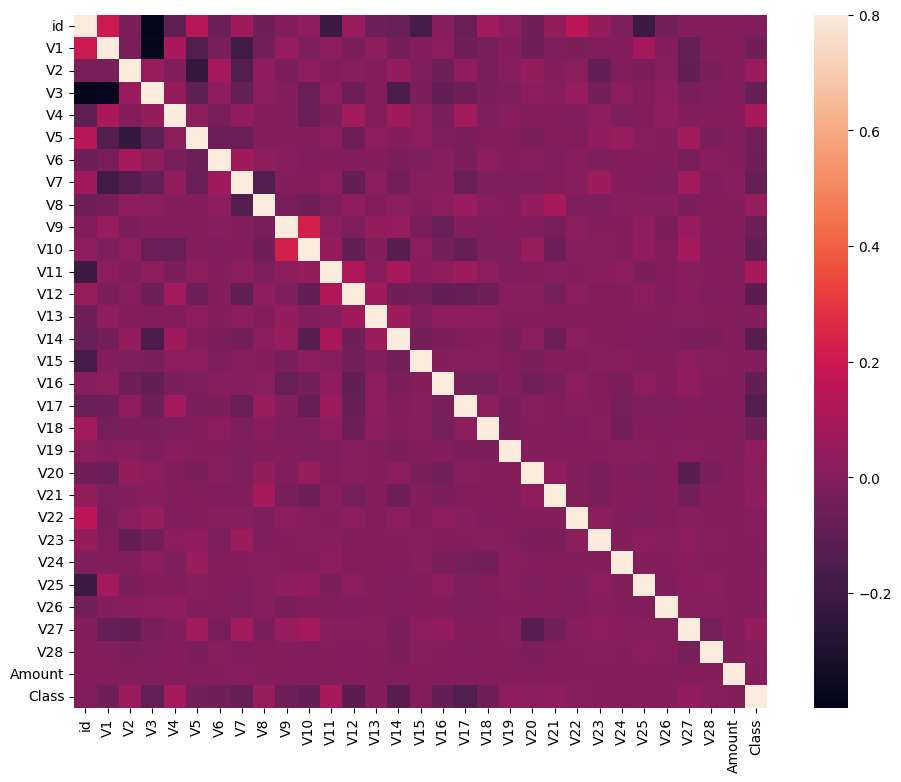

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
xData = X.values
yData = Y.values

(238540, 30)
(238540,)


In [ ]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

In [ ]:
def evaluate_model(model):
    model.fit(xTrain, yTrain)
    yPred = model.predict(xTest)
    mcc = matthews_corrcoef(yTest, yPred)
    print(f"{model.__class__.__name__} MCC: {mcc}")
    print(classification_report(yTest, yPred))
    return mcc

In [ ]:
# Naive Bayes
nb = GaussianNB()
evaluate_model(nb)

GaussianNB MCC: 0.1309128006753568
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47632
         1.0       0.26      0.07      0.11        76

    accuracy                           1.00     47708
   macro avg       0.63      0.53      0.55     47708
weighted avg       1.00      1.00      1.00     47708



0.1309128006753568

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
evaluate_model(dt)

DecisionTreeClassifier MCC: 0.7185182822674345
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47632
         1.0       0.71      0.72      0.72        76

    accuracy                           1.00     47708
   macro avg       0.86      0.86      0.86     47708
weighted avg       1.00      1.00      1.00     47708



0.7185182822674345

In [ ]:
# Random Forest
rf = RandomForestClassifier()
evaluate_model(rf)

RandomForestClassifier MCC: 0.8457495999016293
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47632
         1.0       0.92      0.78      0.84        76

    accuracy                           1.00     47708
   macro avg       0.96      0.89      0.92     47708
weighted avg       1.00      1.00      1.00     47708



0.8457495999016293

In [ ]:
# Gradient Boosted Tree
gb = GradientBoostingClassifier()
evaluate_model(gb)

GradientBoostingClassifier MCC: 0.7354171671187885
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47632
         1.0       0.86      0.63      0.73        76

    accuracy                           1.00     47708
   macro avg       0.93      0.82      0.86     47708
weighted avg       1.00      1.00      1.00     47708



0.7354171671187885

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
evaluate_model(lr)

LogisticRegression MCC: 0.7339685377914726
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47632
         1.0       0.82      0.66      0.73        76

    accuracy                           1.00     47708
   macro avg       0.91      0.83      0.86     47708
weighted avg       1.00      1.00      1.00     47708



0.7339685377914726

In [ ]:
# Support Vector Machine
svm = SVC()
evaluate_model(svm)

SVC MCC: 0.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47632
         1.0       0.00      0.00      0.00        76

    accuracy                           1.00     47708
   macro avg       0.50      0.50      0.50     47708
weighted avg       1.00      1.00      1.00     47708



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [ ]:
# Multi-Layer Perceptron
mlp = MLPClassifier(max_iter=1000)
evaluate_model(mlp)

MLPClassifier MCC: 0.3153069501436711
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47632
         1.0       0.63      0.16      0.25        76

    accuracy                           1.00     47708
   macro avg       0.82      0.58      0.63     47708
weighted avg       1.00      1.00      1.00     47708



0.3153069501436711

In [ ]:
# Linear Regression (Converted for Classification)
lr_model = LinearRegression()
lr_model.fit(xTrain, yTrain)
yPred_lr = (lr_model.predict(xTest) > 0.5).astype(int)
mcc_lr = matthews_corrcoef(yTest, yPred_lr)
print(f"Linear Regression MCC: {mcc_lr}")
print(classification_report(yTest, yPred_lr))

Linear Regression MCC: 0.48947112230479595
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47632
         1.0       0.79      0.30      0.44        76

    accuracy                           1.00     47708
   macro avg       0.90      0.65      0.72     47708
weighted avg       1.00      1.00      1.00     47708



In [ ]:
# Deep Learning Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Defining the deep learning model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(xTrain.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dl_model.fit(xTrain, yTrain, epochs=10, batch_size=32, verbose=1)
yPred_dl = (dl_model.predict(xTest) > 0.5).astype(int)
mcc_dl = matthews_corrcoef(yTest, yPred_dl)
print(f"Deep Learning MCC: {mcc_dl}")

Epoch 1/10
5964/5964 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9940 - loss: 19.9454
Epoch 2/10
5964/5964 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9974 - loss: 0.3455
Epoch 3/10
5964/5964 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9981 - loss: 0.0295
Epoch 4/10
5964/5964 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9980 - loss: 0.0170
Epoch 5/10
5964/5964 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9980 - loss: 0.0166
Epoch 6/10
5964/5964 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9982 - loss: 0.0134
Epoch 7/10
5964/5964 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9980 - loss: 0.0190
Epoch 8/10
5964/5964 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9982 - loss: 0.0170
Epoch 9/10
5964/5964 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9982 - loss: 0.0130
Epoch 10/10
5964/5964 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9981 - loss: 0.0138
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Deep Learning MCC: 0.0


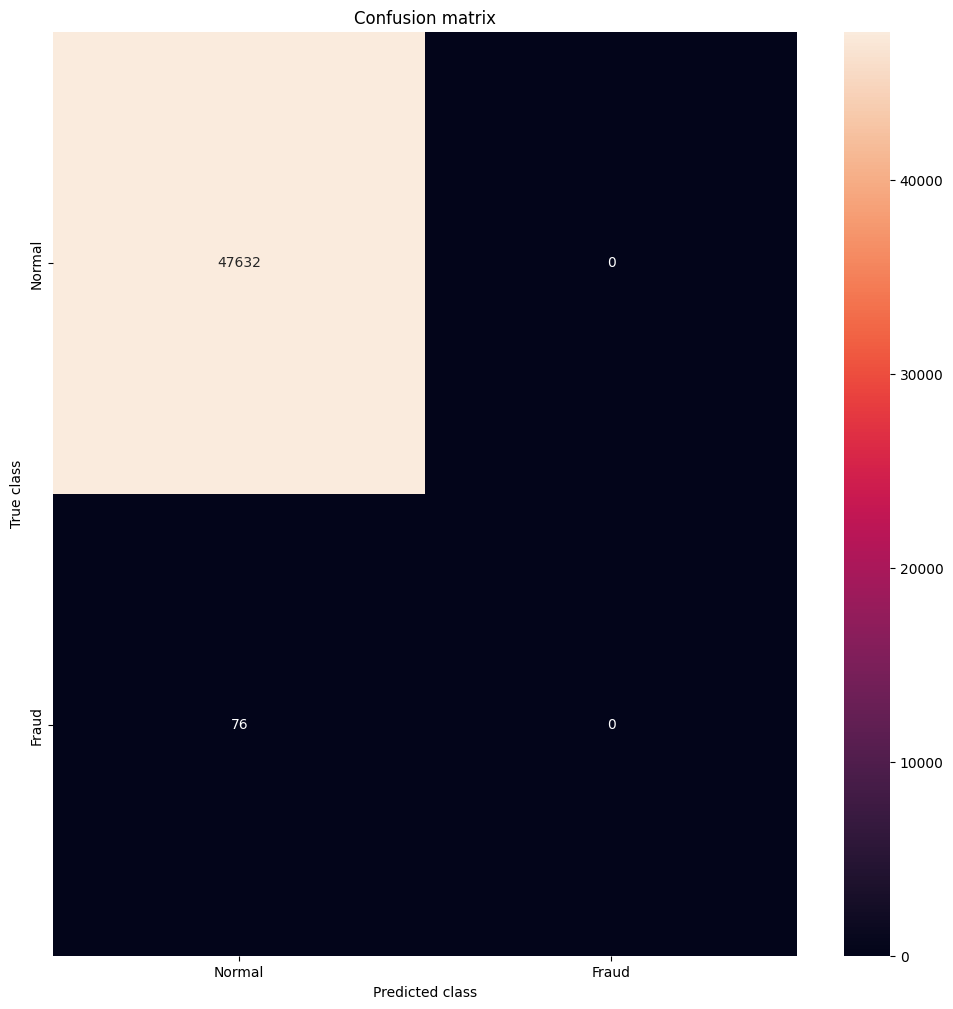

In [ ]:

from sklearn.metrics import confusion_matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred_dl) # Use yPred_dl from  deep learning model or other relevant predictions
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    return {
        "MCC": matthews_corrcoef(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

# Dictionary to store results
results = {}

# Evaluate each model and store results
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Multi-Layer Perceptron": MLPClassifier(max_iter=1000),
    "Linear Regression": LinearRegression(),
    "Deep Learning": dl_model
}

for name, model in models.items():
    if name == "Linear Regression":
        model.fit(xTrain, yTrain)
        yPred = (model.predict(xTest) > 0.5).astype(int)
    elif name == "Deep Learning":
        yPred = (model.predict(xTest) > 0.5).astype(int)
    else:
        model.fit(xTrain, yTrain)
        yPred = model.predict(xTest)
    results[name] = calculate_metrics(yTest, yPred)

# Convert results to a DataFrame for easier visualization
results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1491/1491 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
                             MCC  Accuracy  Precision    Recall  F1-Score
Naive Bayes             0.130913  0.998218   0.263158  0.065789  0.105263
Decision Tree           0.728062  0.999141   0.733333  0.723684  0.728477
Random Forest           0.830133  0.999497   0.919355  0.750000  0.826087
Gradient Boosting       0.735417  0.999245   0.857143  0.631579  0.727273
Logistic Regression     0.733969  0.999224   0.819672  0.657895  0.729927
Support Vector Machine  0.000000  0.998407   0.000000  0.000000  0.000000
Multi-Layer Perceptron  0.000000  0.998407   0.000000  0.000000  0.000000
Linear Regression       0.489471  0.998763   0.793103  0.302632  0.438095
Deep Learning           0.000000  0.998407   0.000000  0.000000  0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-73-0e7a8d267aad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['MCC'], palette='viridis')


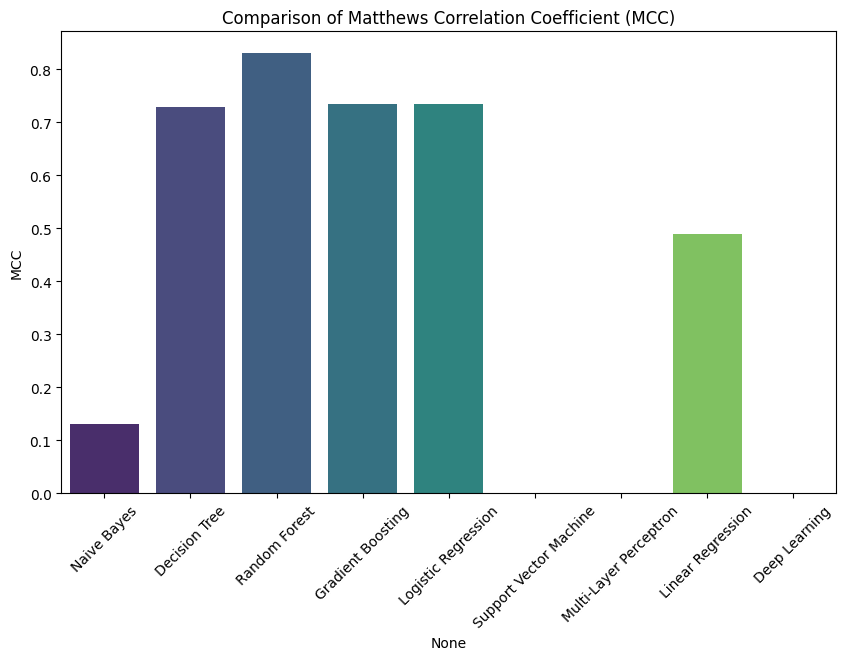

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['MCC'], palette='viridis')
plt.title('Comparison of Matthews Correlation Coefficient (MCC)')
plt.ylabel('MCC')
plt.xticks(rotation=45)
plt.show()

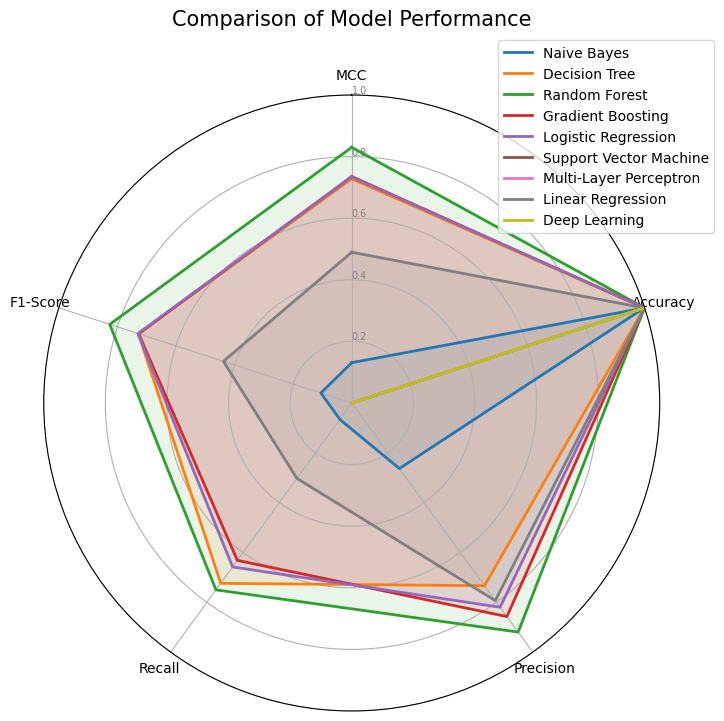

In [ ]:
from math import pi

# Number of variables (metrics)
categories = list(results_df.columns)
N = len(categories)

# Create a radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles := [n / float(N) * 2 * pi for n in range(N)], categories)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], color="grey", size=7)
plt.ylim(0, 1)

# Plot each model
for idx, model in enumerate(results_df.index):
    values = results_df.loc[model].values.flatten().tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles + [angles[0]], values, linewidth=2, linestyle='solid', label=model)
    ax.fill(angles + [angles[0]], values, alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Comparison of Model Performance', size=15, y=1.1)
plt.show()